In [76]:
import torch
import sbi.utils as utils
from sbi.inference.base import infer

import subprocess

import numpy as np
from matplotlib import pyplot as plt

import corner

from astropy import units as u
from astropy import constants as const

import fileinput

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)


### Toy example of SBI - SAM

 https://sbi-dev.github.io/sbi/install/

 https://astroautomata.com/blog/simulation-based-inference/

 SAM-MCMC: https://arxiv.org/pdf/0810.2548.pdf

Benefits over likelihod based:

- self-consistency of simulated observed data. Observed MBHF, bulge relation, LFs are often from different papers with different observational biases. Hence, the observations are not guaranteed to be self-consistent.

- speed / scalability: use deep NN to efficiently learn mapping from inputs to observations

- Flexibility: Any observational quantity can be be added to the model 

In [4]:
import torch
import sbi.utils as utils
from sbi.inference.base import infer

Priors

In [5]:
prior = utils.BoxUniform(
    low=torch.tensor([-5., -5.]),
    high=torch.tensor([5., 5.])
)

In [6]:
def simulator(theta, parfile='../DarkSage/input/millennium.par'):
    # Generate samples from N(mu, sigma=0.5)
    # Run DARK SAGE with parameters theta
    kappa_R, kappa_Q, f_BH = theta

    # Modify the parameter file with theta
    for line in fileinput.input(parfile, inplace=True):
        if 'RadioModeEfficiency' in line:
            print(f'RadioModeEfficiency {kappa_R}')
        elif 'QuasarModeEfficiency' in line:
            print(f'RadioModeEfficiency {kappa_Q}')
        elif 'BlackHoleGrowthRate' in line:
            print(f'BlackHoleGrowthRate {f_BH}')
    
    subprocess.run(["./darksage input/millennium.par"])  # Run dark sage w/ theta arguments

    # Read the Dark sage output and ouput a tensor with the same shape as the "observation" tensor
    # tensor([ 4.3930,  8.7400, 36.9448], dtype=torch.float64)
    # each row is a single galaxy with BH mass, stellar mass, bolometric AGN luminosity
    
    return theta + 0.5 * torch.randn_like(theta)

Learn the likelihood from the simulator

In [7]:
num_sim = 200
method = 'SNRE' #SNPE or SNLE or SNRE
posterior = infer(
    simulator,
    prior,
    # See glossary for explanation of methods.
    #    SNRE newer than SNLE newer than SNPE.
    method=method,
    num_workers=-1,
    num_simulations=num_sim)

total 144
-rw-r--r--  1 colinburke  staff      8 Mar 29 15:55 README.md
drwxr-xr-x  3 colinburke  staff     96 Mar 27 13:06 sbi-logs
-rw-r--r--  1 colinburke  staff  65592 Mar 30 21:56 simple.ipynb
total 144
-rw-r--r--  1 colinburke  staff      8 Mar 29 15:55 README.md
drwxr-xr-x  3 colinburke  staff     96 Mar 27 13:06 sbi-logs
-rw-r--r--  1 colinburke  staff  65592 Mar 30 21:56 simple.ipynb


Running 200 simulations in 200 batches.:   4%|▍         | 8/200 [00:02<00:39,  4.88it/s]

total 144
-rw-r--r--  1 colinburke  staff      8 Mar 29 15:55 README.md
drwxr-xr-x  3 colinburke  staff     96 Mar 27 13:06 sbi-logs
-rw-r--r--  1 colinburke  staff  65592 Mar 30 21:56 simple.ipynb
total 144
-rw-r--r--  1 colinburke  staff      8 Mar 29 15:55 README.md
drwxr-xr-x  3 colinburke  staff     96 Mar 27 13:06 sbi-logs
-rw-r--r--  1 colinburke  staff  65592 Mar 30 21:56 simple.ipynb
total 144
-rw-r--r--  1 colinburke  staff      8 Mar 29 15:55 README.md
drwxr-xr-x  3 colinburke  staff     96 Mar 27 13:06 sbi-logs
-rw-r--r--  1 colinburke  staff  65592 Mar 30 21:56 simple.ipynb
total 144
-rw-r--r--  1 colinburke  staff      8 Mar 29 15:55 README.md
drwxr-xr-x  3 colinburke  staff     96 Mar 27 13:06 sbi-logs
-rw-r--r--  1 colinburke  staff  65592 Mar 30 21:56 simple.ipynb
total 144
-rw-r--r--  1 colinburke  staff      8 Mar 29 15:55 README.md
drwxr-xr-x  3 colinburke  staff     96 Mar 27 13:06 sbi-logs
-rw-r--r--  1 colinburke  staff  65592 Mar 30 21:56 simple.ipynb
total 144


Running 200 simulations in 200 batches.:  30%|███       | 60/200 [00:02<00:02, 52.38it/s]

total 144
-rw-r--r--  1 colinburke  staff      8 Mar 29 15:55 README.md
drwxr-xr-x  3 colinburke  staff     96 Mar 27 13:06 sbi-logs
-rw-r--r--  1 colinburke  staff  65592 Mar 30 21:56 simple.ipynb
total 144
-rw-r--r--  1 colinburke  staff      8 Mar 29 15:55 README.md
drwxr-xr-x  3 colinburke  staff     96 Mar 27 13:06 sbi-logs
-rw-r--r--  1 colinburke  staff  65592 Mar 30 21:56 simple.ipynb
total 144
-rw-r--r--  1 colinburke  staff      8 Mar 29 15:55 README.md
drwxr-xr-x  3 colinburke  staff     96 Mar 27 13:06 sbi-logs
-rw-r--r--  1 colinburke  staff  65592 Mar 30 21:56 simple.ipynb
total 144
-rw-r--r--  1 colinburke  staff      8 Mar 29 15:55 README.md
drwxr-xr-x  3 colinburke  staff     96 Mar 27 13:06 sbi-logs
-rw-r--r--  1 colinburke  staff  65592 Mar 30 21:56 simple.ipynb
total 144
-rw-r--r--  1 colinburke  staff      8 Mar 29 15:55 README.md
drwxr-xr-x  3 colinburke  staff     96 Mar 27 13:06 sbi-logs
-rw-r--r--  1 colinburke  staff  65592 Mar 30 21:56 simple.ipynb
total 144


Running 200 simulations in 200 batches.:  79%|███████▉  | 158/200 [00:02<00:00, 171.94it/s]

total 144
-rw-r--r--  1 colinburke  staff      8 Mar 29 15:55 README.md
drwxr-xr-x  3 colinburke  staff     96 Mar 27 13:06 sbi-logs
-rw-r--r--  1 colinburke  staff  65592 Mar 30 21:56 simple.ipynb
total 144
-rw-r--r--  1 colinburke  staff      8 Mar 29 15:55 README.md
drwxr-xr-x  3 colinburke  staff     96 Mar 27 13:06 sbi-logs
-rw-r--r--  1 colinburke  staff  65592 Mar 30 21:56 simple.ipynb
total 144
-rw-r--r--  1 colinburke  staff      8 Mar 29 15:55 README.md
drwxr-xr-x  3 colinburke  staff     96 Mar 27 13:06 sbi-logs
-rw-r--r--  1 colinburke  staff  65592 Mar 30 21:56 simple.ipynb
total 144
-rw-r--r--  1 colinburke  staff      8 Mar 29 15:55 README.md
drwxr-xr-x  3 colinburke  staff     96 Mar 27 13:06 sbi-logs
-rw-r--r--  1 colinburke  staff  65592 Mar 30 21:56 simple.ipynb
total 144
-rw-r--r--  1 colinburke  staff      8 Mar 29 15:55 README.md
drwxr-xr-x  3 colinburke  staff     96 Mar 27 13:06 sbi-logs
-rw-r--r--  1 colinburke  staff  65592 Mar 30 21:56 simple.ipynb
total 144


Running 200 simulations in 200 batches.: 100%|██████████| 200/200 [00:02<00:00, 73.74it/s] 


total 144
-rw-r--r--  1 colinburke  staff      8 Mar 29 15:55 README.md
drwxr-xr-x  3 colinburke  staff     96 Mar 27 13:06 sbi-logs
-rw-r--r--  1 colinburke  staff  65592 Mar 30 21:56 simple.ipynb
total 144
-rw-r--r--  1 colinburke  staff      8 Mar 29 15:55 README.md
drwxr-xr-x  3 colinburke  staff     96 Mar 27 13:06 sbi-logs
-rw-r--r--  1 colinburke  staff  65592 Mar 30 21:56 simple.ipynb
 Neural network successfully converged after 94 epochs.

### Generate observed distributions

In [15]:
def GSMF(M_star, size=1, mean=True):
    """
    Galaxy stellar mass function of the z ~ 0 blue+green galaxy population (single Schechter function)
    https://ui.adsabs.harvard.edu/abs/2012MNRAS.421..621B/abstract
    """
    logM_br = 10.78
    dlogM_br = 0.01
    
    phi1 = 2.96*1e-3
    dphi1 = 0.40*1e-3
    
    phi2 = 0.63*1e-3
    dphi2 = 0.10*1e-3
    
    alpha1 = -0.62
    dalpha1 = 0.03
    
    alpha2 = -1.50
    dalpha2 = 0.01

    if mean==False:
    
        M_br = 10**np.random.normal(loc=logM_br, scale=dlogM_br, size=size)*u.Msun
        phi1 = np.random.normal(loc=phi1, scale=dphi1, size=size)*u.Mpc**-3
        
        phi2 = np.random.normal(loc=phi2, scale=dphi2, size=size)*u.Mpc**-3
        
        alpha1 = np.random.normal(loc=alpha1, scale=dalpha1, size=size)
        alpha2 = np.random.normal(loc=alpha2, scale=dalpha2, size=size)

    else:

        M_br = 10**logM_br*u.Msun
        phi1 = phi1*u.Mpc**-3
        
        phi2 = phi2*u.Mpc**-3

    phi = np.exp(-M_star/M_br)/M_br * (phi1*(M_star/M_br)**alpha1 + phi2*(M_star/M_br)**alpha2)

    return phi

In [9]:
def inv_transform_sampling(y, x, n_samples=1000):
    """
    Perform inverse transform sampling on curve y(x)
    https://tmramalho.github.io/blog/2013/12/16/how-to-do-inverse-transformation-sampling-in-scipy-and-numpy/
    https://en.wikipedia.org/wiki/Inverse_transform_sampling
    """
    dx = np.diff(x)
    cum_values = np.zeros(x.shape)
    cum_values[1:] = np.cumsum(y*dx)/np.sum(y*dx)
    r = np.random.rand(int(n_samples))
    return np.interp(r, cum_values, x)

(45, 12869)


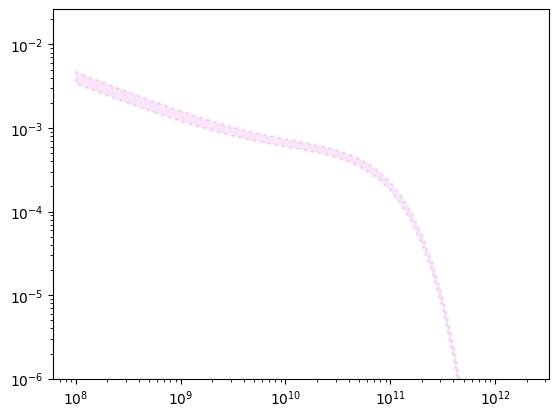

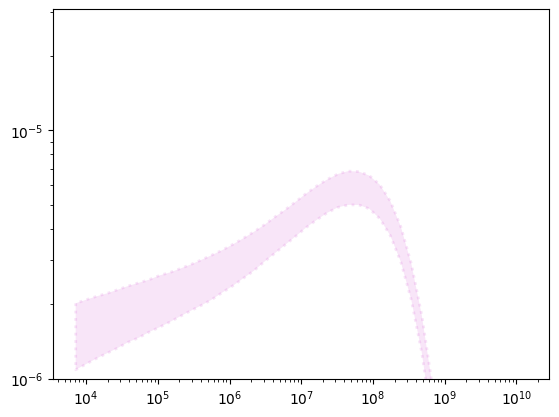

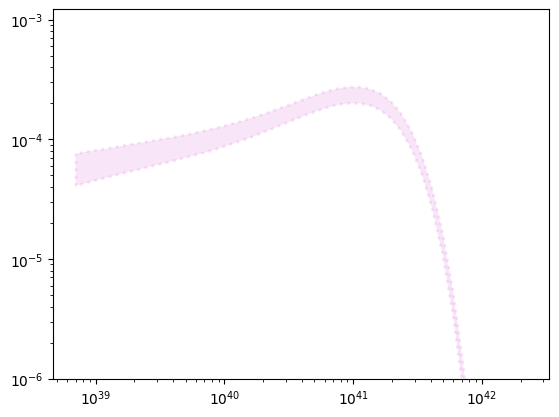

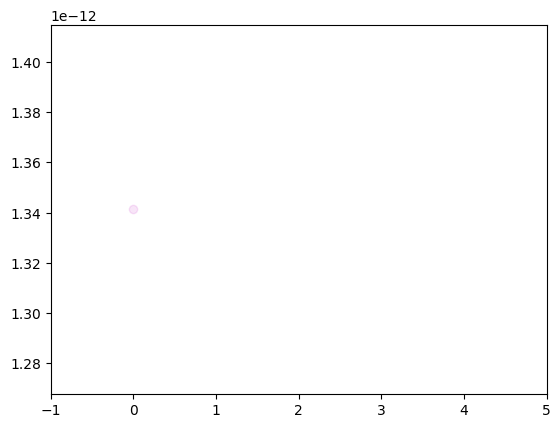

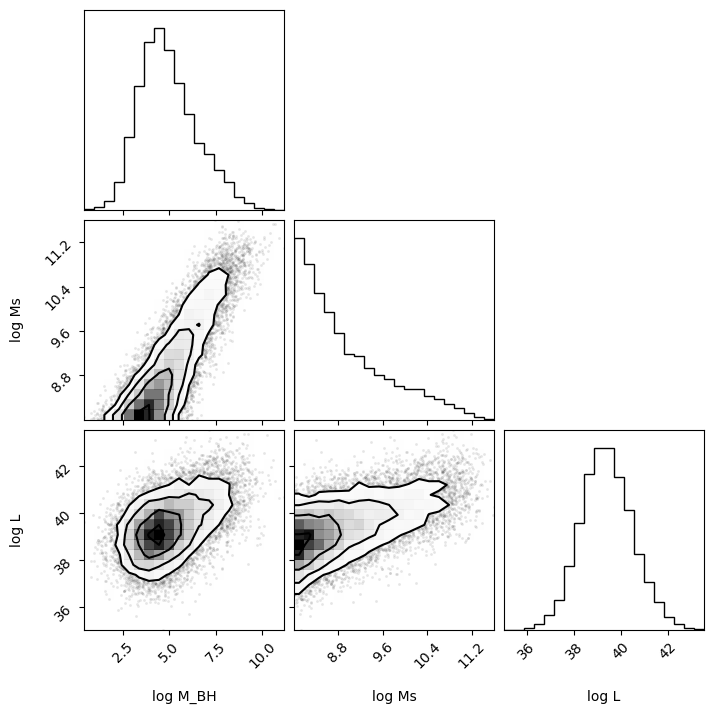

In [75]:
dlogms =  0.1
logms = np.arange(8.0, 12.5, dlogms)
ms = 10**logms
dms = np.diff(ms, axis=0)

# TODO: use median
# Sample the "observations" from the GSMF
gsmf_mean = GSMF(ms*u.Msun, mean=True).value
omega = 4*np.pi*u.sr
V = (cosmo.comoving_volume(.01)*omega/(4*np.pi*u.sr)).to(u.Mpc**3).value
N_draw = int(V*np.trapz(gsmf_mean[:-1]*dms))

shape = [len(logms), N_draw]

# BH - stellar mass relation
# GSH20, All, limits
alpha = np.random.normal(7.43, 0.09, size=N_draw)
beta = np.random.normal(1.61, 0.12, size=N_draw)
sigma = np.random.normal(0.81, 0.06, size=N_draw)
logms0 = np.log10(3*1e10)

logmb = alpha.T + beta.T*(logms[:, np.newaxis] - logms0)
mb = 10**logmb
#_ms = np.median(ms, axis=1)
dmb = np.diff(mb, axis=0)

ms = np.ones(N_draw)*ms[:, np.newaxis]

print(ms.shape)

gsmf = GSMF(ms*u.Msun, mean=False, size=N_draw).value

plt.fill_between(ms[:-1,0], np.percentile(gsmf[:-1], 16, axis=1)*dms,
                 np.percentile(gsmf[:-1], 84, axis=1)*dms,
                color="m", alpha=0.1, zorder=-1, label='this work', lw=2, ls='dotted')
plt.loglog()
plt.ylim(1e-6, None)
plt.show()

dist_stellar_mass = inv_transform_sampling(np.percentile(gsmf[:-1,:], 50, axis=1), ms[:,0], N_draw)
dist_log_stellar_mass = np.log10(dist_stellar_mass)

# Sample the "observations" from the BHMF
# Assuming occupation fraction of 1

# Plot BHMF
N = np.random.normal(loc=alpha.T + beta.T*(logms[:, np.newaxis] - logms0), scale=sigma)
bhmf_1 = (gsmf * N) 
plt.fill_between(mb[:-1,0], np.percentile(bhmf_1[:-1], 16, axis=1)*dmb[:,0],
                 np.percentile(bhmf_1[:-1], 84, axis=1)*dmb[:,0],
                 color="m", alpha=0.1, zorder=-1, label='this work', lw=2, ls='dotted')
plt.loglog()
plt.ylim(1e-6, None)
plt.show()

# Sample the "observations" from the BHLF
dist_log_bh_mass = np.random.normal(loc = alpha + beta*(dist_log_stellar_mass.T - logms0), scale=sigma)

# stellar mass - L_X relation
alpha = np.random.normal(39.25, 0.2, size=shape[1])
beta = np.random.normal(0.8, 0.05, size=shape[1])
sigma = np.random.normal(0.9, 0.05, size=shape[1])
logms0 = 10

# Convolve
N = np.random.normal(loc=alpha.T + beta.T*(logms[:, np.newaxis] - logms0), scale=sigma)
logl = 1 + alpha.T + beta.T*(logms[:, np.newaxis] - logms0)
l = 10**logl
bhlf_1 = (bhmf_1 * N) 
plt.fill_between(l[:-1,0], np.percentile(bhlf_1[:-1], 16, axis=1)*dmb[:,0],
                 np.percentile(bhlf_1[:-1], 84, axis=1)*dmb[:,0],
                 color="m", alpha=0.1, zorder=-1, label='this work', lw=2, ls='dotted')
plt.loglog()
plt.ylim(1e-6, None)
plt.show()

# bolometric correction of 10
dist_log_l_bol = 1 + np.random.normal(loc = alpha + beta*(dist_log_stellar_mass.T - logms0), scale=sigma)

# Convert LF to rho = |BHAR| / V
eta = 0.1
BHAR = (10**np.mean(dist_log_l_bol)*u.erg/u.s)/(eta * const.c**2)
BHAR = BHAR.to(u.Msun/u.yr)

plt.errorbar(0, (BHAR/V).value, marker='o',
                 color="m", alpha=0.1, zorder=-1, label='this work', lw=2, ls='dotted')
plt.xlim(-1, 5)
plt.show()


# Plot the "observed" posterior
observation = torch.tensor([dist_log_bh_mass, dist_log_stellar_mass, dist_log_l_bol]).T
corner.corner(observation.numpy(), labels=['log M_BH', 'log Ms', 'log L']);


In [77]:
observation[0] # An observation of a single BH

tensor([ 6.9126,  9.5060, 40.2250], dtype=torch.float64)

In [ ]:
samples = posterior.sample((200,), x=observation[0])

In [ ]:
log_probability = posterior.log_prob(samples, x=observation[0])
corner.corner(samples.numpy());